1) Escolha uma base de dados de classificação (ex.: wine, breast cancer, iris). O
Scikit-learn e o UCI Repository possuem algumas bases. Caso algum dado seja
categórico, transforme para númerico.
2) Divida os dados em treino/teste utilizando a técnica hold-out. Escolha uma
porcentagem para treino/teste (mais utilizadas: 90/10, 80/20, 75/25, 70/30, 50/50).
3) Realize a classificação utilizando o KNN, utilizando a biblioteca Scikit-Learn.
4) Calcule algumas métricas. Obrigatório: acurácia. Exemplo de outras métricas: recall,
precision, F1-Score. Utilize o Scikit-Learn (classification_report, accuracy_score,
f1_score, etc)
5) Plot a matriz de confusão.
6) Realize vários experimentos, modificando a quantidade de vizinhos (parametro
n_neighbors), e crie um plot (k vs acurácia).
7) Discuta os resultados encontrados.
8) Utilize a técnica k-fold e discuta os resultados, comparando com a técnica hold-out.

In [582]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [583]:
cols = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.read_csv("Dataset\iris (1).data", header=None, names=cols)

In [584]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [585]:
X = df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [586]:
Y = df.iloc[:,4]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [587]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [588]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
79,5.7,2.6,3.5,1.0
98,5.1,2.5,3.0,1.1
55,5.7,2.8,4.5,1.3
46,5.1,3.8,1.6,0.2
85,6.0,3.4,4.5,1.6
...,...,...,...,...
105,7.6,3.0,6.6,2.1
45,4.8,3.0,1.4,0.3
10,5.4,3.7,1.5,0.2
57,4.9,2.4,3.3,1.0


In [589]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
80,5.5,2.4,3.8,1.1
54,6.5,2.8,4.6,1.5
94,5.6,2.7,4.2,1.3
32,5.2,4.1,1.5,0.1
21,5.1,3.7,1.5,0.4
69,5.6,2.5,3.9,1.1
90,5.5,2.6,4.4,1.2
135,7.7,3.0,6.1,2.3
122,7.7,2.8,6.7,2.0
149,5.9,3.0,5.1,1.8


In [590]:
Y_train

79     Iris-versicolor
98     Iris-versicolor
55     Iris-versicolor
46         Iris-setosa
85     Iris-versicolor
            ...       
105     Iris-virginica
45         Iris-setosa
10         Iris-setosa
57     Iris-versicolor
83     Iris-versicolor
Name: class, Length: 112, dtype: object

In [591]:
Y_test

80     Iris-versicolor
54     Iris-versicolor
94     Iris-versicolor
32         Iris-setosa
21         Iris-setosa
69     Iris-versicolor
90     Iris-versicolor
135     Iris-virginica
122     Iris-virginica
149     Iris-virginica
129     Iris-virginica
15         Iris-setosa
38         Iris-setosa
130     Iris-virginica
8          Iris-setosa
7          Iris-setosa
84     Iris-versicolor
86     Iris-versicolor
36         Iris-setosa
89     Iris-versicolor
27         Iris-setosa
142     Iris-virginica
62     Iris-versicolor
106     Iris-virginica
51     Iris-versicolor
134     Iris-virginica
143     Iris-virginica
117     Iris-virginica
44         Iris-setosa
49         Iris-setosa
111     Iris-virginica
95     Iris-versicolor
33         Iris-setosa
34         Iris-setosa
59     Iris-versicolor
108     Iris-virginica
71     Iris-versicolor
63     Iris-versicolor
Name: class, dtype: object

In [592]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [593]:
neigh2 = KNeighborsClassifier() #n_neighbours default = 5

In [594]:
neigh3 = KNeighborsClassifier(n_neighbors=7)

In [595]:
neigh4 = KNeighborsClassifier(n_neighbors=1)

Sempre transformar entradas categoricas em numericas

In [596]:
labelencoder = LabelEncoder()

Y_train = labelencoder.fit_transform(Y_train)


In [597]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [598]:
neigh2.fit(X_train, Y_train)

KNeighborsClassifier()

In [599]:
neigh3.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [600]:
neigh4.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [601]:
Y_test = labelencoder.fit_transform(Y_test)
Y_test

array([1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1])

In [602]:
Y_predict = neigh.predict(X_test)
Y_predict

C:\Users\francisco.neto\.conda\envs\ai\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1])

In [603]:
Y_predict2 = neigh2.predict(X_test)
Y_predict2

C:\Users\francisco.neto\.conda\envs\ai\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1])

In [604]:
Y_predict3 = neigh3.predict(X_test)
Y_predict3

C:\Users\francisco.neto\.conda\envs\ai\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1])

In [605]:
Y_predict4 = neigh4.predict(X_test)
Y_predict4

C:\Users\francisco.neto\.conda\envs\ai\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1])

In [606]:
Y_test

array([1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1])

In [607]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [608]:
acurr = accuracy_score(Y_test,Y_predict)

In [609]:
print(classification_report(Y_test,Y_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [610]:
acurr1 = accuracy_score(Y_test,Y_predict2)

In [611]:
print(classification_report(Y_test,Y_predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [612]:
acurr2 = accuracy_score(Y_test,Y_predict3)

In [613]:
print(classification_report(Y_test,Y_predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [614]:
acurr3 = accuracy_score(Y_test,Y_predict4)

In [615]:
cm = confusion_matrix(Y_test,Y_predict)

In [616]:
cm2 = confusion_matrix(Y_test,Y_predict2)

In [617]:
cm3 = confusion_matrix(Y_test,Y_predict3)

In [618]:
cm4 = confusion_matrix(Y_test,Y_predict4)

In [619]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

In [620]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

In [621]:
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)

In [622]:
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)

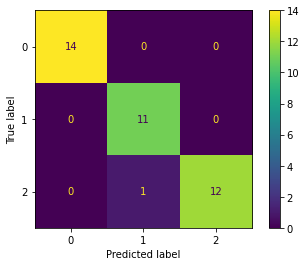

In [577]:
disp.plot()

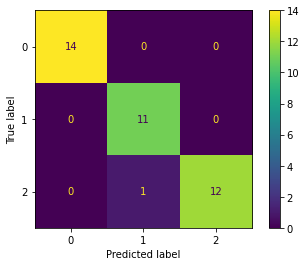

In [578]:
disp2.plot()

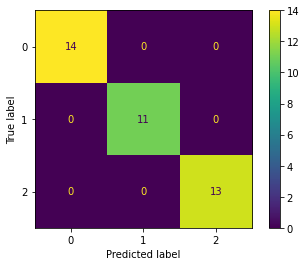

In [579]:
disp3.plot()

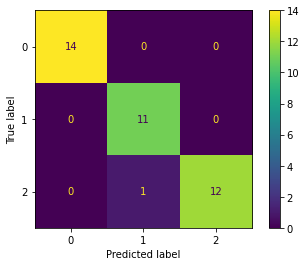

In [580]:
disp4.plot()

In [581]:
k_vs_acurr = pd.DataFrame([3,5,7,1],[acurr,acurr1,acurr2,acurr3])
k_vs_acurr

,0
0.973684,3
0.973684,5
1.000000,7
0.973684,1
